#### This notebook generates a ball tree and then shows a few pretty plots.

In [1]:
push!(LOAD_PATH, "../..")
using NearestNeighbors
using Colors
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

In [2]:
tree = BallTree(rand(2,100), Euclidean(); leafsize = 10)

NearestNeighbors.BallTree{Float64,Distances.Euclidean}
  Number of points: 100
  Dimensions: 2
  Metric: Distances.Euclidean()
  Reordered: true

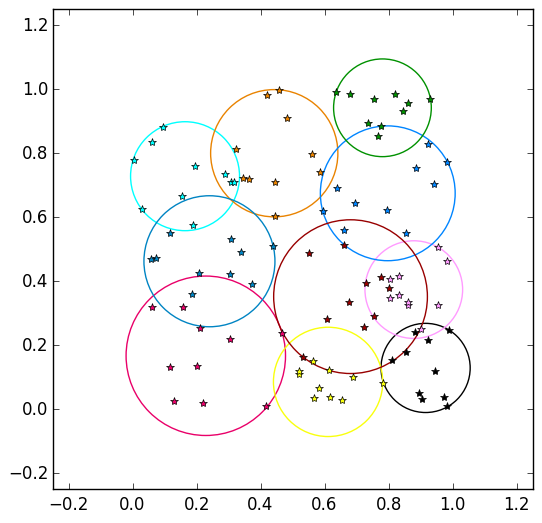

In [3]:
import NearestNeighbors.HyperSphere

# Adds a sphere to an axis
function add_sphere(ax, hs::HyperSphere, col)
    ell = patch.Circle(hs.center, radius = hs.r, facecolor="none", edgecolor=col)
    ax[:add_artist](ell)
end

# Skip non leaf nodes
offset = tree.tree_data.n_internal_nodes + 1
nleafs = tree.tree_data.n_leafs

# Range of leaf nodes
index_range = offset: offset + nleafs - 1

# Generate some nice colors
cols = distinguishable_colors(length(index_range), RGB(0,0,0))

# Create figure
cfig = figure()
ax = cfig[:add_subplot](1,1,1)
ax[:set_aspect]("equal")
axis((-.25,1.25,-.25,1.25))


for (i, idx) = enumerate(index_range)
    col = cols[i]
    # Get the indices of the leaf nodes into the tree data
    range = NearestNeighbors.get_leaf_range(tree.tree_data, idx)
    d = tree.data[:, range]
    
    # Plot the points in the hyper spehre
    plot(vec(d[1,:]), vec(d[2,:]), "*", color = (col.r, col.g, col.b))
    
    # And the hypersphere itself
    sphere = tree.hyper_spheres[idx]
    add_sphere(ax, sphere, (col.r, col.g, col.b))
end

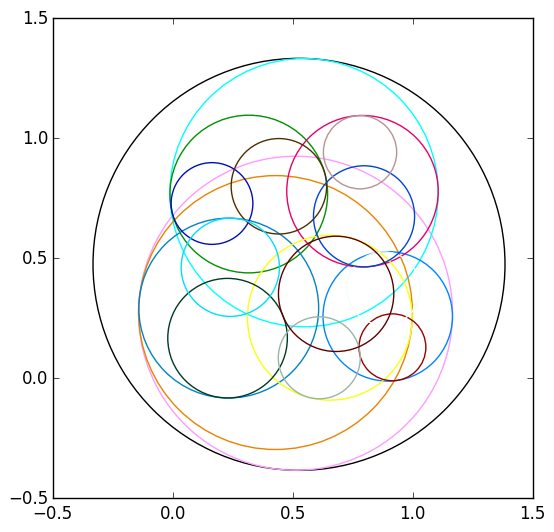

In [4]:
# Range of leaf nodes
index_range = 1: offset + nleafs - 1

# Generate some nice colors
cols = distinguishable_colors(length(index_range), RGB(0,0,0))

# Create figure
cfig = figure()
ax = cfig[:add_subplot](1,1,1)
ax[:set_aspect]("equal")
axis((-.5,1.5,-.5,1.5))

for (i, idx) = enumerate(index_range)
    col = cols[i]
    # And the hypersphere itself
    sphere = tree.hyper_spheres[idx]
    add_sphere(ax, sphere, (col.r, col.g, col.b))
end